In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def EnergyUse(group, area):
    """
    output: Energy consumption in GJ
    """
    if group == 'a':
        beta0 = 3.
        beta1 = 1.
        sigma = 2500.
    if group == 'b':
        beta0 = 2.
        beta1 = 2.
        sigma = 7000. 
    return beta0 + beta1 * area + np.random.randn(area.shape[0]) * sigma

Text(0, 0.5, 'Energy Consumption [GJ]')

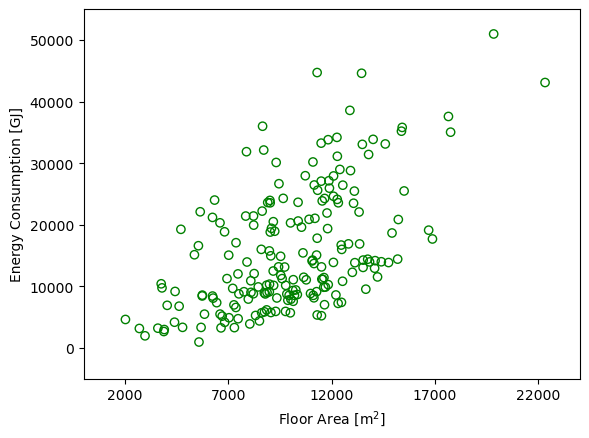

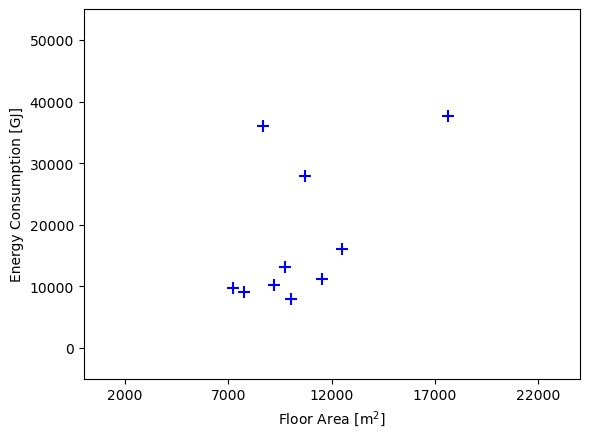

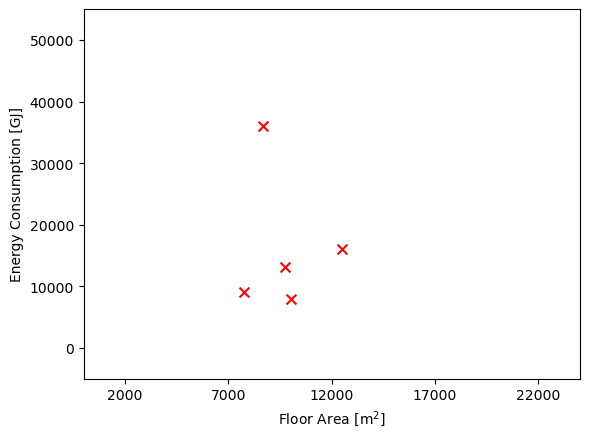

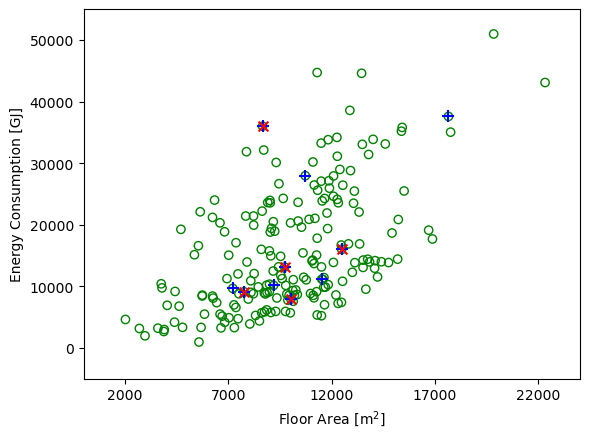

In [3]:
# random data generation
np.random.seed(2)
N=100
Area_A = ((np.random.randn(N)) * 3000 + 10000) # m^2
Area_B = ((np.random.randn(N)) * 3000 + 10000) # m^2
Energy_A = EnergyUse('a',Area_A) # GJ
Energy_B = EnergyUse('b',Area_B) # GJ
Area = np.hstack((Area_A,Area_B))
Energy = np.hstack((Energy_A,Energy_B))
DF = pd.DataFrame({'Area [m^2]':Area, 'Energy [GJ]':Energy})

# take a subset
np.random.seed(1234256)
idx = np.arange(0,N*2)
np.random.shuffle(idx)
idx = idx[:10]
DF_sub = DF.loc[idx].copy()
DF_sub.set_index(np.arange(0,DF_sub.shape[0]),inplace=True)

# take a subsubset
np.random.seed(1112)
idx = np.arange(0,10)
np.random.shuffle(idx)
idx = idx[:5]
DF_sub_sub = DF_sub.loc[idx].copy()
DF_sub_sub.set_index(np.arange(0,DF_sub_sub.shape[0]),inplace=True)

# plot
plt.subplots()
plt.scatter(DF['Area [m^2]'], DF['Energy [GJ]'], facecolors="None", edgecolors='g')
plt.xlim(0,24000)
plt.xticks(np.arange(2000,23000,5000))
plt.xlabel('Floor Area [m$^2$]')
plt.ylim(-5000,55000)
plt.ylabel('Energy Consumption [GJ]')

# plot
plt.subplots()
plt.scatter(DF_sub['Area [m^2]'], DF_sub['Energy [GJ]'], color='b', marker='+',s=70)
plt.xlim(0,24000)
plt.xticks(np.arange(2000,23000,5000))
plt.xlabel('Floor Area [m$^2$]')
plt.ylim(-5000,55000)
plt.ylabel('Energy Consumption [GJ]')

# plot
plt.subplots()
plt.scatter(DF_sub_sub['Area [m^2]'], DF_sub_sub['Energy [GJ]'], color='r', marker='x',s=50)
plt.xlim(0,24000)
plt.xticks(np.arange(2000,23000,5000))
plt.xlabel('Floor Area [m$^2$]')
plt.ylim(-5000,55000)
plt.ylabel('Energy Consumption [GJ]')

# plot
plt.subplots()
plt.scatter(DF['Area [m^2]'], DF['Energy [GJ]'], facecolors="None", edgecolors='g')
plt.scatter(DF_sub['Area [m^2]'], DF_sub['Energy [GJ]'], color='b', marker='+',s=70)
plt.scatter(DF_sub_sub['Area [m^2]'], DF_sub_sub['Energy [GJ]'], color='r', marker='x',s=50)
plt.xlim(0,24000)
plt.xticks(np.arange(2000,23000,5000))
plt.xlabel('Floor Area [m$^2$]')
plt.ylim(-5000,55000)
plt.ylabel('Energy Consumption [GJ]')

In [4]:
DF.to_csv('Full data.csv')
DF_sub.to_csv('Subset data.csv')
DF_sub_sub.to_csv('Subsubset data.csv')

In [5]:
from sklearn.linear_model import LinearRegression

Text(0, 0.5, 'Energy Consumption [GJ]')

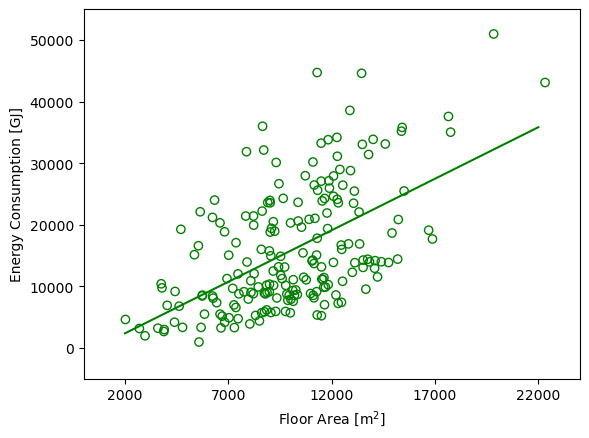

In [6]:
LR_full = LinearRegression().fit(Area[:,None]/50000., Energy[:,None]/50000.)
# plot
plt.subplots()
plt.scatter(DF['Area [m^2]'], DF['Energy [GJ]'], facecolors="None", edgecolors='g')
plt.plot(np.linspace(2000, 22000,100),(np.linspace(2000, 22000,100)/50000.*LR_full.coef_[0][0]+LR_full.intercept_[0])*50000.,'g')
plt.xlim(0,24000)
plt.xticks(np.arange(2000,23000,5000))
plt.xlabel('Floor Area [m$^2$]')
plt.ylim(-5000,55000)
plt.ylabel('Energy Consumption [GJ]')

Text(0, 0.5, 'Energy Consumption [GJ]')

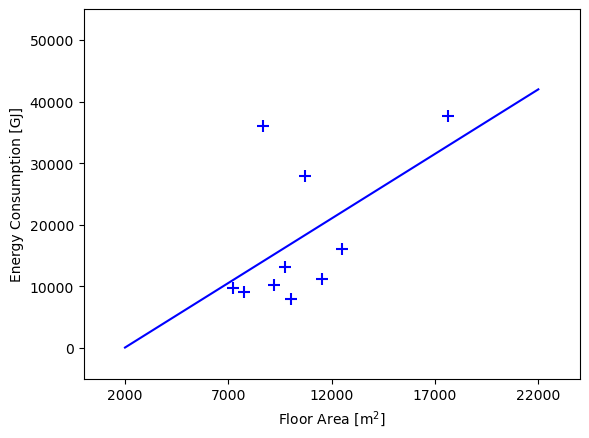

In [7]:
LR_sub = LinearRegression().fit(DF_sub['Area [m^2]'].values[:,None]/50000., DF_sub['Energy [GJ]'].values[:,None]/50000.)
# plot
plt.subplots()
plt.scatter(DF_sub['Area [m^2]'], DF_sub['Energy [GJ]'], color='b', marker='+',s=70)
plt.plot(np.linspace(2000, 22000,100),(np.linspace(2000, 22000,100)/50000.*LR_sub.coef_[0][0]+LR_sub.intercept_[0])*50000.,'b')
plt.xlim(0,24000)
plt.xticks(np.arange(2000,23000,5000))
plt.xlabel('Floor Area [m$^2$]')
plt.ylim(-5000,55000)
plt.ylabel('Energy Consumption [GJ]')

Text(0, 0.5, 'Energy Consumption [GJ]')

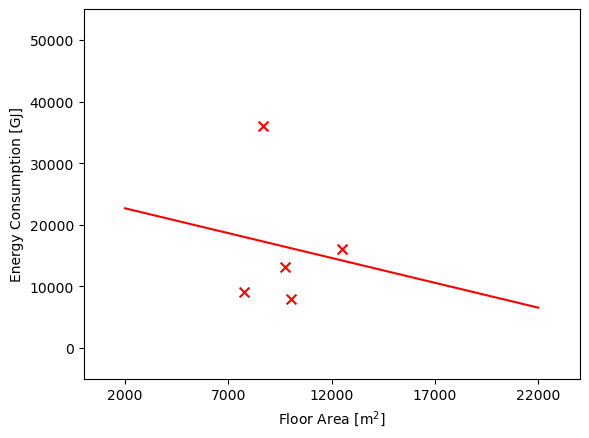

In [8]:
LR_subsub = LinearRegression().fit(DF_sub_sub['Area [m^2]'].values[:,None]/50000., DF_sub_sub['Energy [GJ]'].values[:,None]/50000.)
# plot
plt.subplots()
plt.scatter(DF_sub_sub['Area [m^2]'], DF_sub_sub['Energy [GJ]'], color='r', marker='x',s=50)
plt.plot(np.linspace(2000, 22000,100),(np.linspace(2000, 22000,100)/50000.*LR_subsub.coef_[0][0]+LR_subsub.intercept_[0])*50000.,'r')
plt.xlim(0,24000)
plt.xticks(np.arange(2000,23000,5000))
plt.xlabel('Floor Area [m$^2$]')
plt.ylim(-5000,55000)
plt.ylabel('Energy Consumption [GJ]')

Text(0, 0.5, 'Energy Consumption [GJ]')

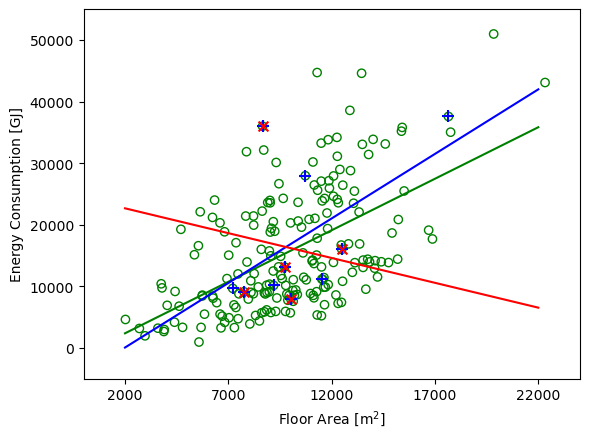

In [9]:
plt.subplots()
plt.scatter(DF['Area [m^2]'], DF['Energy [GJ]'], facecolors="None", edgecolors='g')
plt.scatter(DF_sub['Area [m^2]'], DF_sub['Energy [GJ]'], color='b', marker='+',s=70)
plt.scatter(DF_sub_sub['Area [m^2]'], DF_sub_sub['Energy [GJ]'], color='r', marker='x',s=50)
plt.plot(np.linspace(2000, 22000,100),(np.linspace(2000, 22000,100)/50000.*LR_full.coef_[0][0]+LR_full.intercept_[0])*50000.,'g')
plt.plot(np.linspace(2000, 22000,100),(np.linspace(2000, 22000,100)/50000.*LR_sub.coef_[0][0]+LR_sub.intercept_[0])*50000.,'b')
plt.plot(np.linspace(2000, 22000,100),(np.linspace(2000, 22000,100)/50000.*LR_subsub.coef_[0][0]+LR_subsub.intercept_[0])*50000.,'r')
plt.xlim(0,24000)
plt.xticks(np.arange(2000,23000,5000))
plt.xlabel('Floor Area [m$^2$]')
plt.ylim(-5000,55000)
plt.ylabel('Energy Consumption [GJ]')